# Association Rule

**Association rule mining** is a technique to identify underlying relations between different items.

Usually, there is a pattern in what the customers buy. 

**Market Basket analysis**

More profit can be generated if the relationship between the items purchased in different transactions can be identified.

The process of identifying an associations between products is called association rule mining.

## Theory of Apriori Algorithm

Apriori 演算法是「關聯規則學習」或是「關聯分析（Associative Analysis）」的經典演算法之一

目的是在一個資料集當中，找出不同項與項之間可能存在的關係

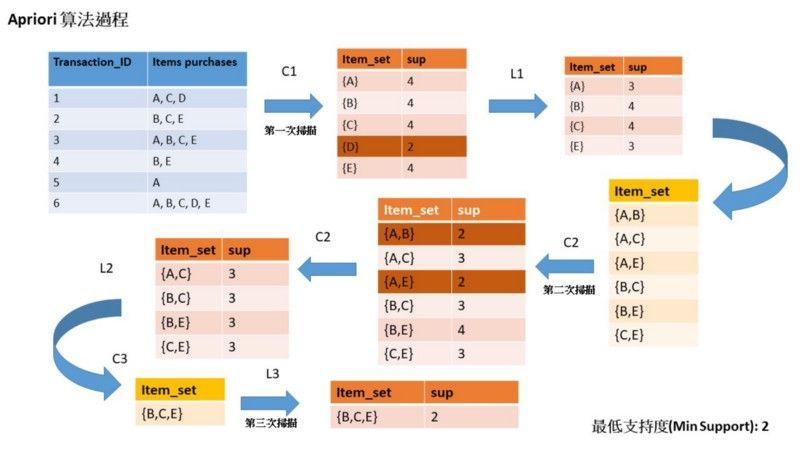

There are three major components of Apriori algorithm:
- 支持度（Support）
- 信賴度（Confidence）
- 提昇度（Lift）

### 支持度（Support）

Support refers to the default popularity of an item and can be calculated by finding number of transactions containing a particular item divided by total number of transactions.

這個商品組合在所有購買清單中，出現的機率

Support(X) = (Transactions containing (X)) / (Total Transactions)

It is the probability of an event to occur.

For instance if out of 1000 transactions, 100 transactions contain X then the support for item X can be calculated as:

Support(X) = (Transactions containing X) / (Total Transactions)

Support(X) = 100 / 1000 = 10%

### 信賴度（Confidence）

Confidence refers to the likelihood that an item B is also bought if item A is bought. It can be calculated by finding the number of transactions where A and B are bought together, divided by total number of transactions where A is bought.

購買A商品後，購買B商品的機率

Confidence(A→B) = (Transactions containing both (A and B)) / (Transactions containing A)

It is a measure of conditional probability

For instance if we had 50 transactions where A and B were bought together. While in 150 transactions, A are bought. Then we can find likelihood of buying B when a A is bought can be represented as confidence of A -> B and can be mathematically written as:

Confidence(A→B) = 50 / 150 = 33.3%

### 提昇度（Lift）

Lift(A -> B) refers to the increase in the ratio of sale of B when A is sold. A Lift of 1 means there is no association between products A and B. Lift of greater than 1 means products A and B are more likely to be bought together. Finally, Lift of less than 1 refers to the case where two products are unlikely to be bought together.

判斷A商品與B商品的相關程度，若小於1表示負相關，等於1表示完全無相關（完全沒有交集），大於1表示正相關

Lift(A –> B) can be calculated by dividing Confidence(A -> B) divided by Support(B). Mathematically it can be represented as:

Lift(A→B) = (Confidence (A→B)) / (Support (B))


It is the probability of all items occurring together divided by the product of antecedent and consequent occurring as if they are independent of each other.

For instance the Lift(A -> B) can be calculated as:

Lift(Burger→Ketchup) = 33.3 / 10 = 3.33

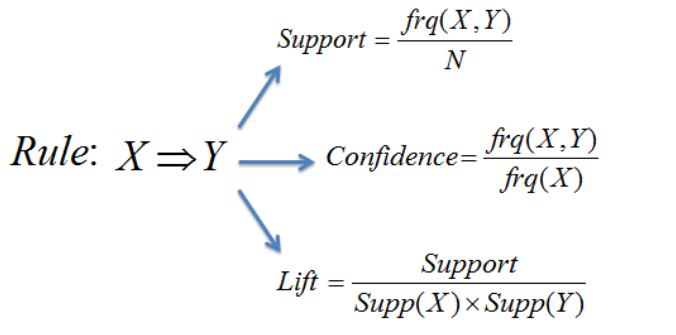

For large sets of data, there can be hundreds of items in hundreds of thousands transactions. The Apriori algorithm tries to extract rules for each possible combination of items. But this process can be extremely slow due to the number of combinations. 

To speed up the process, we need to perform the following steps:

- Set a minimum value for support and confidence. This means that we are only interested in finding rules for the items that have certain default existence (e.g. support) and have a minimum value for co-occurrence with other items (e.g. confidence).

- Extract all the subsets having higher value of support than minimum threshold.

- Select all the rules from the subsets with confidence value higher than minimum threshold.

- Order the rules by descending order of Lift.

本次會使用到的套件:

- Numpy - Matrices and Mathematical Functions
- Pandas - Data Manipulation and Analysis
- Matplotlib - Simple Visualization
- mlxtend - It is a Python library of useful tools for the day-to-day data science tasks
- apyori - It is a simple implementation of Apriori algorithm, provided as APIs and as commandline interfaces

mlxtend

http://rasbt.github.io/mlxtend/

apyori

https://github.com/ymoch/apyori

# mlxtend

In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset = [['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
           ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
           ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]

## Frequent Itemsets

由於 apriori function 要求 data 使用 pandas DataFrame格式，如果 raw data 是其他格式，則需要用 Transaction Encoder 的 fit 和 transform 轉檔

Transaction Encoder 可以從dataset中 learns unique items，並將每一個 transaction ( Python 的 List ) 轉變成one-hot encoded boolean Numpy array

# Aprioi

Get frequent itemsets from a one-hot DataFrame

apriori(df, min_support=0.5, use_colnames=False, max_len=None, verbose=0, low_memory=False)

重要參數:
- df : 編碼後的dataframe
- min_suppoet : 給定的最小支持度
- use_colnames : 預設False，則返回的物品組會用編號顯示，為True的話直接顯示物品名稱
- max_len : 最大物品組合數，預設是None，不做限制

http://rasbt.github.io/mlxtend/api_subpackages/mlxtend.frequent_patterns/

# Association rules

association_rules(df, metric='confidence', min_threshold=0.8, support_only=False)

重要參數:
- df : pandas DataFrame
- metric : string (default: 'confidence')
- min_threshold : float (default: 0.8)
- support_only : bool (default: False)

http://rasbt.github.io/mlxtend/api_subpackages/mlxtend.frequent_patterns/

用 Apriori 產生 association rules 的流程：

1. 轉做 one-hot encoded boolean Numpy array
2. 轉做 pandas Dataframe 表格格式
3. 用 mlxtend.frequent_patterns import apriori（+ min_sup)
4. 加回 column names
5. Filtering result
6. Generate association rules (+ min_cof)
7. Filtering result

# 練習

使用 GroceryStoreDataSet 資料集來練習 associate rule

In [26]:
df = pd.read_csv('GroceryStoreDataSet.csv', names = ['products'], sep = ',')
df.head()

products
0             MILK,BREAD,BISCUIT
1  BREAD,MILK,BISCUIT,CORNFLAKES
2            BREAD,TEA,BOURNVITA
3           JAM,MAGGI,BREAD,MILK
4              MAGGI,TEA,BISCUIT

In [27]:
df.shape

(20, 1)

# apyori

In [35]:
import numpy as np
import pandas as pd

In [51]:
data = [['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
        ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
        ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
        ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
        ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]

association_rules(df, min_support, min_confidence, min_lift, max_length)

重要參數:

- df : 輸入的資料，格式可參考以下
- min_support : This parameter is used to select the items with support values greater than the value specified by the parameter.
- min_confidence : This parameter filters those rules that have confidence greater than the confidence threshold specified by the parameter.
- min_lift : This parameter specifies the minimum lift value for the short listed rules.
- max_length : This parameter specifies the minimum number of items that you want in your rules.

資料格式：
- Each item is separated with a tab.
- Each transactions is separated with a line feed code.

https://github.com/ymoch/apyori

In [39]:
from apyori import apriori

# 練習

使用 store_data 資料集並利用 apyori 套件來練習 associate rule

In [ ]:
import numpy as np
import pandas as pd

In [69]:
store_data = pd.read_csv('./datasets/store_data.csv',  header = None)
store_data.head()

0          1           2                 3             4   \
0         shrimp    almonds     avocado    vegetables mix  green grapes   
1        burgers  meatballs        eggs               NaN           NaN   
2        chutney        NaN         NaN               NaN           NaN   
3         turkey    avocado         NaN               NaN           NaN   
4  mineral water       milk  energy bar  whole wheat rice     green tea   

                 5     6               7             8             9   \
0  whole weat flour  yams  cottage cheese  energy drink  tomato juice   
1               NaN   NaN             NaN           NaN           NaN   
2               NaN   NaN             NaN           NaN           NaN   
3               NaN   NaN             NaN           NaN           NaN   
4               NaN   NaN             NaN           NaN           NaN   

               10         11     12     13             14      15  \
0  low fat yogurt  green tea  honey  salad  mineral water  salmon   
1             NaN        NaN    NaN    NaN            NaN     NaN   
2             NaN        NaN    NaN    NaN            NaN     NaN   
3             NaN        NaN    NaN    NaN            NaN     NaN   
4             NaN        NaN    NaN    NaN            NaN     NaN   

                  16               17       18         19  
0  antioxydant juice  frozen smoothie  spinach  olive oil  
1                NaN              NaN      NaN        NaN  
2                NaN              NaN      NaN        NaN  
3                NaN              NaN      NaN        NaN  
4                NaN              NaN      NaN        NaN

## Reference

https://stackabuse.com/association-rule-mining-via-apriori-algorithm-in-python/

https://medium.com/analytics-vidhya/association-analysis-in-python-2b955d0180c

https://medium.com/行銷搬進大程式/購物籃分析-part1-5c9496cad065

https://stackabuse.com/association-rule-mining-via-apriori-algorithm-in-python/